In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

# %matplotlib notebook
%matplotlib inline

In [8]:
#   Сделаем в диф. ур-е ddy = f(x, y, dy) замену
#   dy/dx = z
#   dz/dx = f(x, y, z)
#   и будем решать два уравнения
#   dy/dx = g(x, y, z) = z
#   dz/dx = f(x, y, z)


# Метод Эйлера
def Euler(ddy, dy0, y0, x, h):
    y = [0 for i in range(len(x))]
    z = [0 for i in range(len(x))]
    y[0] = y0
    z[0] = dy0

    for i in range(1, len(x)):
        y[i] = y[i - 1] + h * z[i - 1]
        z[i] = z[i - 1] + h * ddy(x[i - 1], y[i - 1], z[i - 1])
    return y


def RungeKutta(ddy, dy0, y0, x, h):
    y = [0 for i in range(len(x))]
    z = [0 for i in range(len(x))]
    y[0] = y0
    z[0] = dy0

    for i in range(1, len(x)):
        #   коэфиценты для dy/dx = z
        ky1 = z[i - 1]
        ky2 = z[i - 1] + h * ky1 / 2
        ky3 = z[i - 1] + h * ky2 / 2
        ky4 = z[i - 1] + h * ky3

        #   коэфиценты для dz/dx = f(x, y, z)
        kz1 = ddy(x[i - 1], y[i - 1], z[i - 1])
        kz2 = ddy(x[i - 1] + h / 2, y[i - 1] + h * kz1 / 2, z[i - 1] + h * kz1 / 2)
        kz3 = ddy(x[i - 1] + h / 2, y[i - 1] + h * kz2 / 2, z[i - 1] + h * kz2 / 2)
        kz4 = ddy(x[i - 1] + h, y[i - 1] + h * kz3, z[i - 1] + h * kz3)

        z[i] = z[i - 1] + h * (kz1 + 2 * kz2 + 2 * kz3 + kz4) / 6
        y[i] = y[i - 1] + h * (ky1 + 2 * ky2 + 2 * ky3 + ky4) / 6

    return y


def Adams(ddy, dy0, y0, x, h):
    y = [0 for i in range(len(x))]
    z = [0 for i in range(len(x))]
    y[0] = y0
    z[0] = dy0

    #   Находим первые 4 значения в сетке методом Рунге-Кутта 4-го порядка для dy и y
    for i in range(1, 4):
        #   коэфиценты для z = dy
        ky1 = z[i - 1]
        ky2 = z[i - 1] + h * ky1 / 2
        ky3 = z[i - 1] + h * ky2 / 2
        ky4 = z[i - 1] + h * ky3

        #   коэфиценты для dz = f(x, y, z)
        kz1 = ddy(x[i - 1], y[i - 1], z[i - 1])
        kz2 = ddy(x[i - 1] + h / 2, y[i - 1] + h * kz1 / 2, z[i - 1] + h * kz1 / 2)
        kz3 = ddy(x[i - 1] + h / 2, y[i - 1] + h * kz2 / 2, z[i - 1] + h * kz2 / 2)
        kz4 = ddy(x[i - 1] + h, y[i - 1] + h * kz3, z[i - 1] + h * kz3)

        z[i] = z[i - 1] + h * (kz1 + 2 * kz2 + 2 * kz3 + kz4) / 6
        y[i] = y[i - 1] + h * (ky1 + 2 * ky2 + 2 * ky3 + ky4) / 6

    #   Используем метод Адамся для нахождения след значений
    for i in range(4, len(x)):
        k1 = ddy(x[i - 1], y[i - 1], z[i - 1])
        k2 = ddy(x[i - 2], y[i - 2], z[i - 2])
        k3 = ddy(x[i - 3], y[i - 3], z[i - 3])
        k4 = ddy(x[i - 4], y[i - 4], z[i - 4])

        z[i] = z[i - 1] + h / 24 * (55 * k1 - 59 * k2 + 37 * k3 - 9 * k4)
        y[i] = y[i - 1] + h / 24 * (55 * z[i - 1] - 59 * z[i - 2] + 37 * z[i - 3] - 9 * z[i - 4])

    return y

In [9]:
function = lambda x, y, dy: (x*x-1)/x*dy +(x*x+1)/x/x*y
interval = [1, 2]
step = 0.1
y0 = 1 + math.exp(1/2)
dy0 = 2*math.exp(1/2) - 1
# Точное решение
y_lambda = lambda x: (3*math.exp(x*x/2) + 1 - 2*math.exp(1/2))/x

Введите величиину шага: 0.1


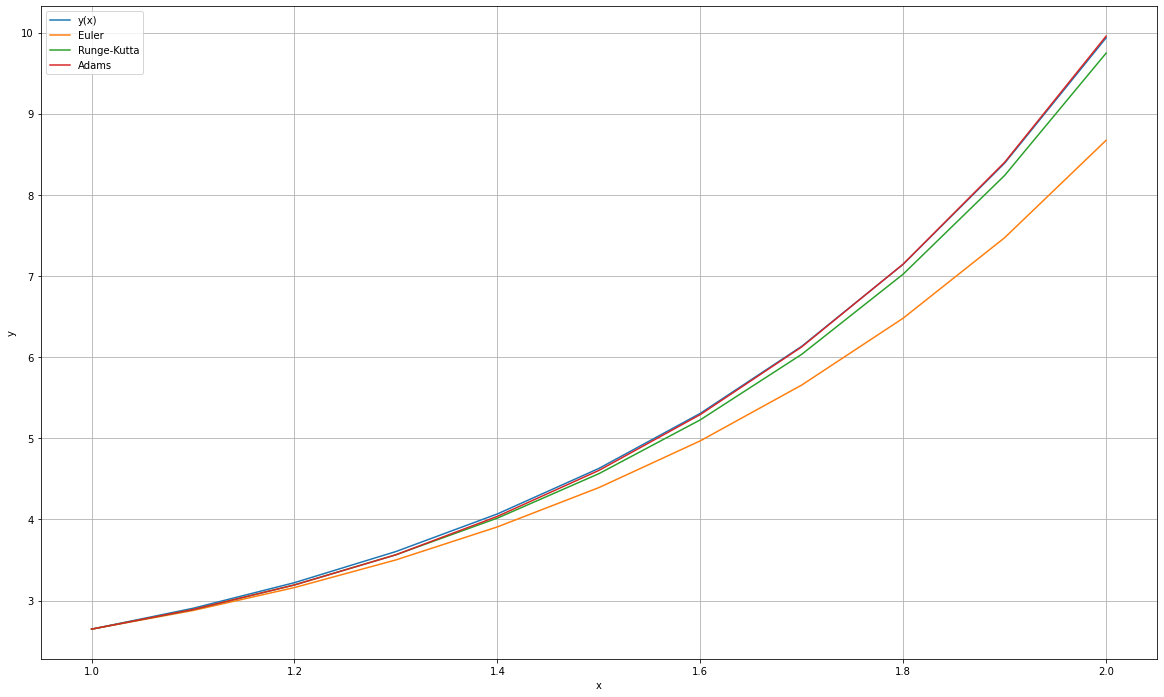

In [21]:
step = float(input("Введите величиину шага: "))
x_list = list(np.arange(interval[0], interval[1] + step / 2, step))
euler = Euler(function, dy0, y0, x_list, step)
runge_kutt = RungeKutta(function, dy0, y0, x_list, step)
adams = Adams(function, dy0, y0, x_list, step)

y = [y_lambda(x) for x in x_list]

plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_list, y, label="y(x)")
plt.plot(x_list, euler, label="Euler")
plt.plot(x_list, runge_kutt, label="Runge-Kutta")
plt.plot(x_list, adams, label="Adams")
plt.legend(loc=2)
None

# Оценка погрешности

In [22]:
def RungeRombergRichardson(Fh, Fkh):
    return Fh + (Fh - Fkh)/(0.5*0.5 - 1)

In [23]:
Euler_error = []
RungeKutta_error = []
Adams_error = []

for i in range(len(y)):
    Euler_error.append(math.fabs(y[i] - RungeRombergRichardson(y[i], euler[i])))
    RungeKutta_error.append(math.fabs(y[i] - RungeRombergRichardson(y[i], runge_kutt[i])))
    Adams_error.append(math.fabs(y[i] - RungeRombergRichardson(y[i], adams[i])))
    
print('Суммарная ошибка:')
print('Ошибка в методе Эйлера:', sum(Euler_error))
print('Ошибка в методе Рунге-Кутта:', sum(RungeKutta_error))
print('Ошибка в методе Адамса:', sum(Adams_error)) 
   
print()
print('Средне арифметическая ошибка:')
print('Ошибка в методе Эйлера:', sum(Euler_error)/len(Euler_error))
print('Ошибка в методе Рунге-Кутта:', sum(RungeKutta_error)/len(RungeKutta_error))
print('Ошибка в методе Адамса:', sum(Adams_error)/len(Adams_error))

print()
print('Средне квадратичная ошибка:')
print('Ошибка в методе Эйлера:', math.sqrt(sum([i*i for i in Euler_error])))
print('Ошибка в методе Рунге-Кутта:', math.sqrt(sum([i*i for i in RungeKutta_error])))
print('Ошибка в методе Адамса:', math.sqrt(sum([i*i for i in Adams_error])))

Суммарная ошибка:
Ошибка в методе Эйлера: 5.665043364438769
Ошибка в методе Рунге-Кутта: 1.1203205958420877
Ошибка в методе Адамса: 0.25891560602307884

Средне арифметическая ошибка:
Ошибка в методе Эйлера: 0.5150039422217062
Ошибка в методе Рунге-Кутта: 0.10184732689473525
Ошибка в методе Адамса: 0.02353778236573444

Средне квадратичная ошибка:
Ошибка в методе Эйлера: 2.428949755290532
Ошибка в методе Рунге-Кутта: 0.4194713252423593
Ошибка в методе Адамса: 0.09394168613879868
